In [0]:
import numpy as np
import operator

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
N = 8e6
data = pd.read_csv('drive/My Drive/2020winter-MLcamp/content/trip_data_1.csv',nrows=N)

fare_data = pd.read_csv('drive/My Drive/2020winter-MLcamp/content/trip_fare_1.csv',nrows=N)
fare_cols = [' payment_type',' fare_amount',' surcharge',' mta_tax',' tip_amount',' tolls_amount',' total_amount']
data = data.join(fare_date[fare_cols])
del fare_data
data[:10]
print(data.shape)
data.loc[:5, data.columns[:5]]

(49999, 21)


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N
5,20D9ECB2CA0767CF7A01564DF2844A3E,598CCE5B9C1918568DEE71F43CF26CD2,CMT,1,N


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Populating the interactive namespace from numpy and matplotlib


(0, 300)

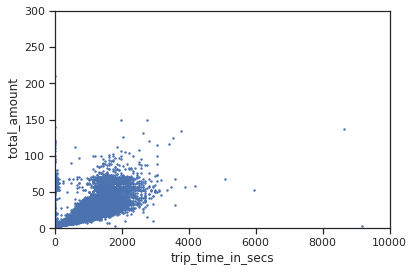

In [0]:
%pylab inline
data.plot(x="trip_time_in_secs", y=" total_amount",kind="scatter",s=2)
xlim(0,1e4)
ylim(0,300)

In [0]:
data.trip_time_in_secs < 500, data[' total_amount'] > 30
ind = where(logical_and(data.trip_time_in_secs<500,data[' total_amount']>30))[0]
data = data.drop(ind)
data.shape

(49833, 21)

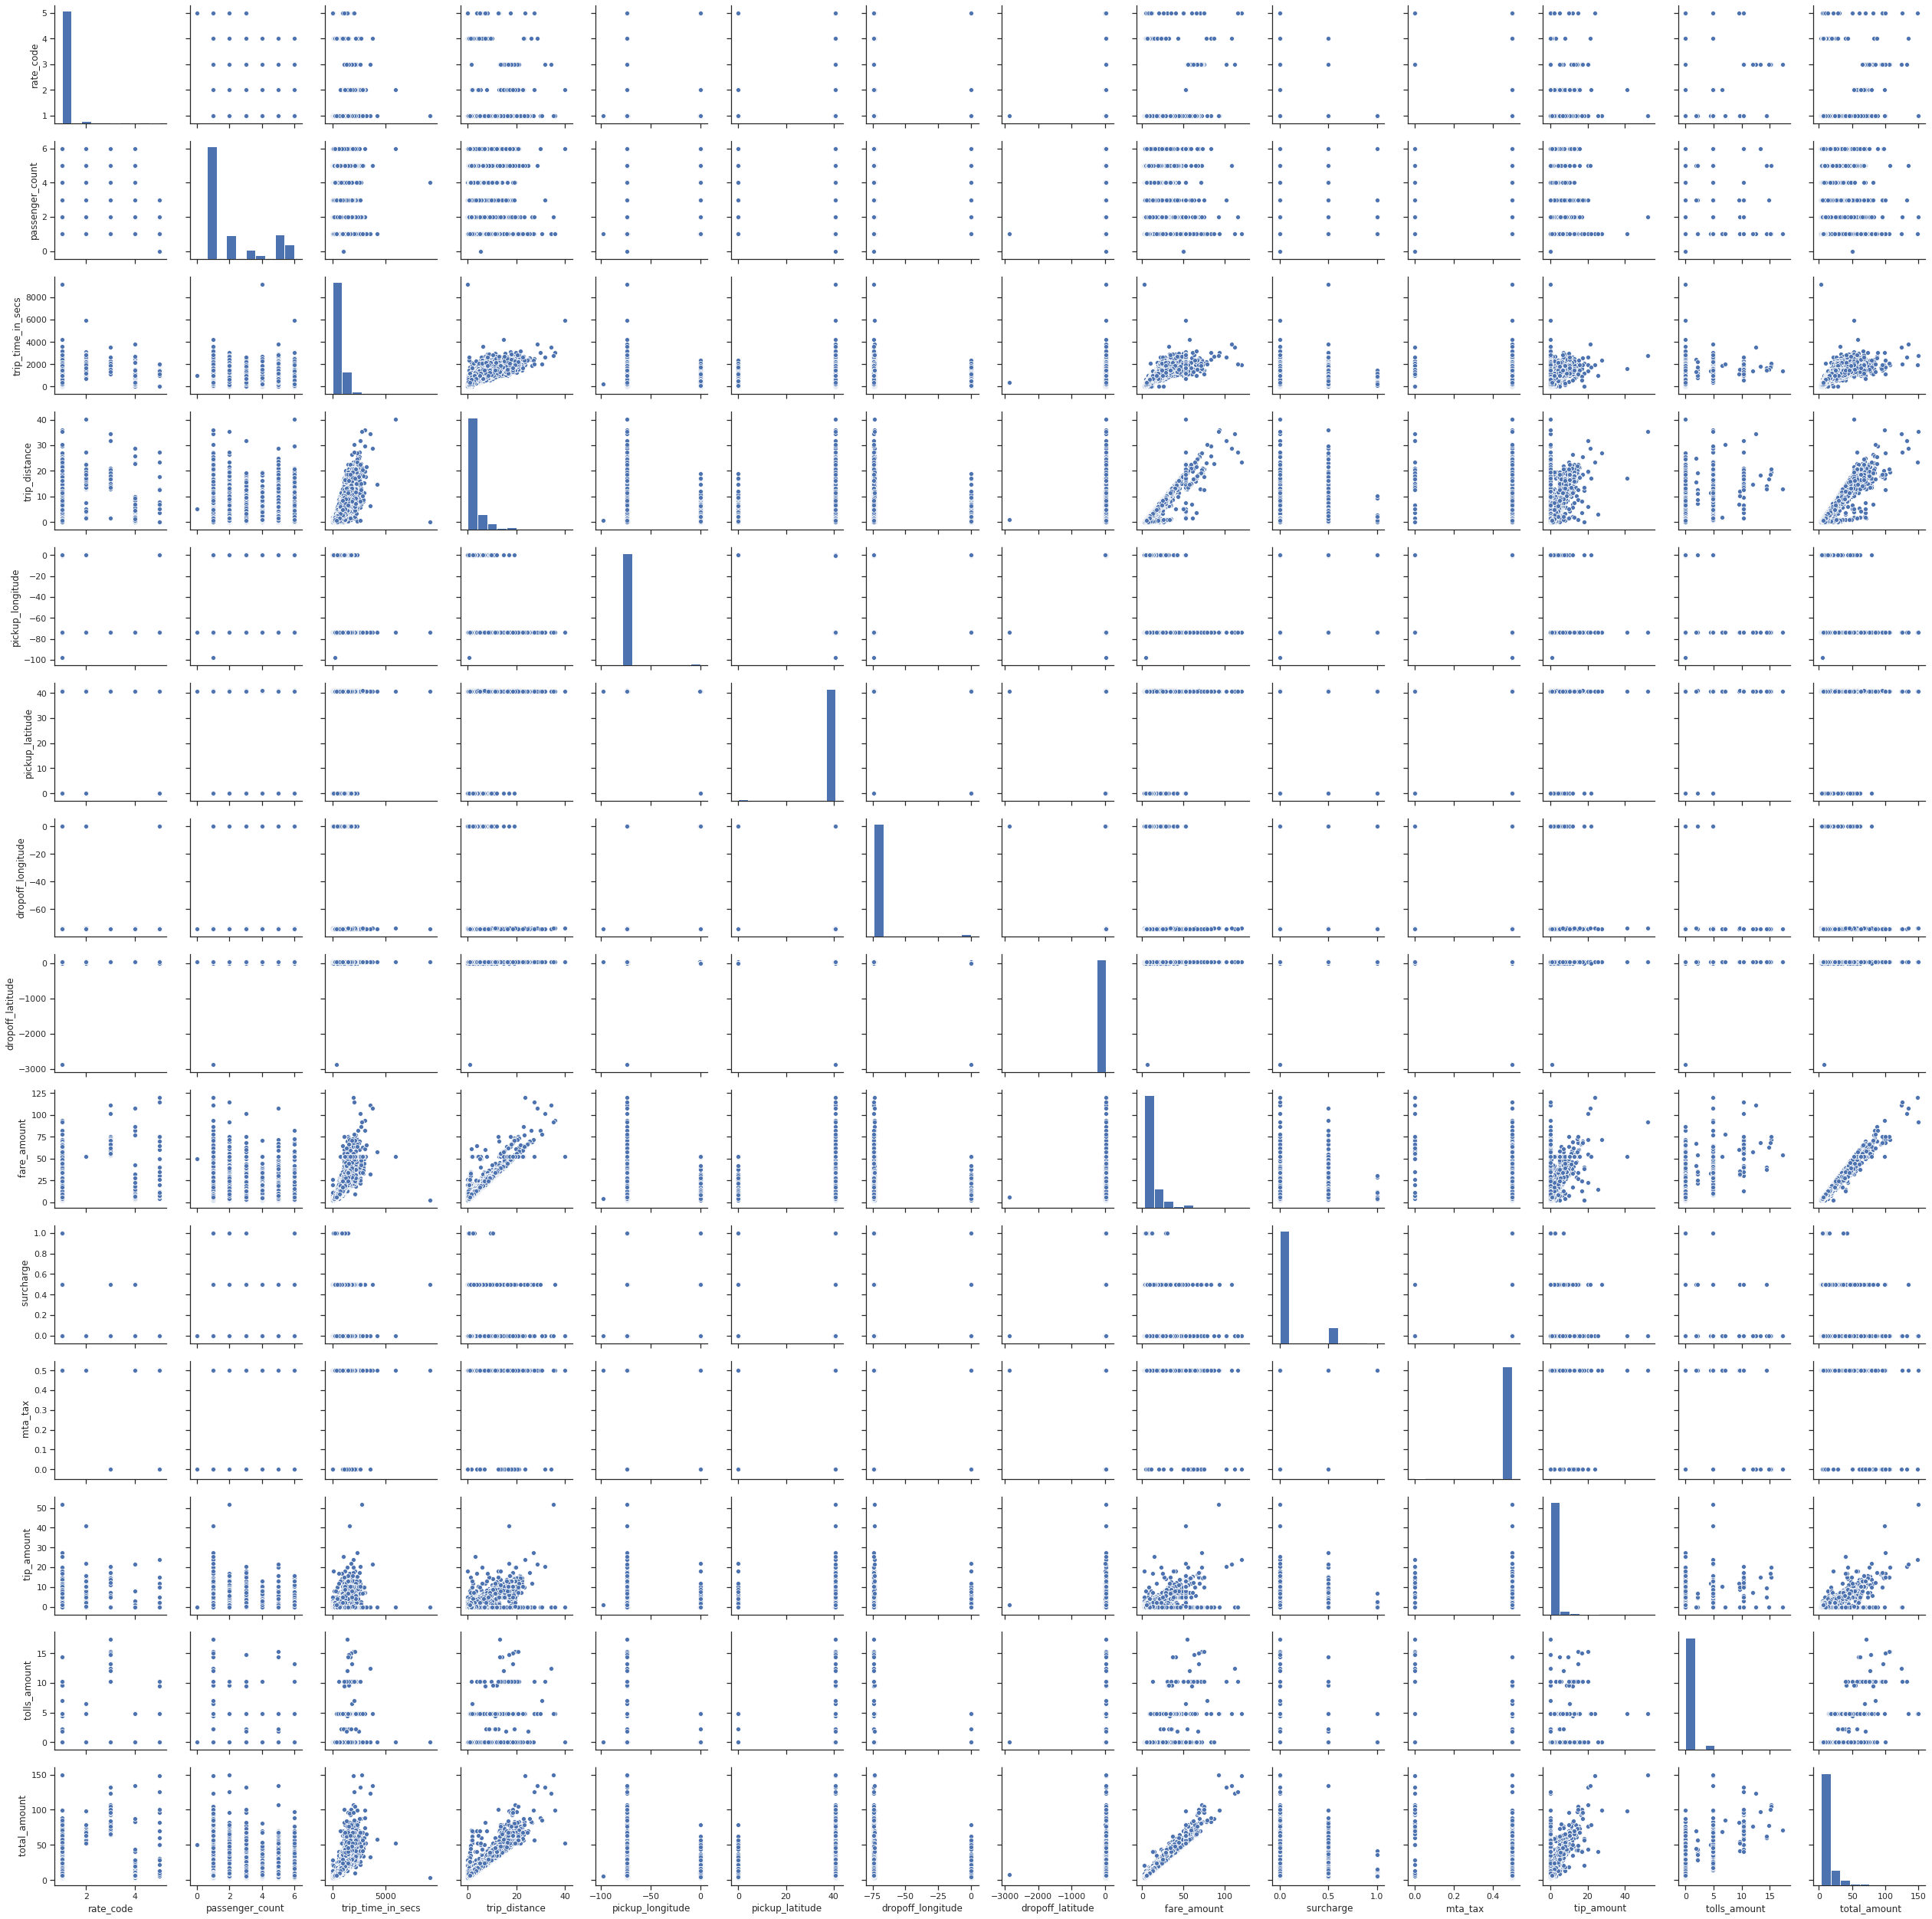

In [0]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g=sns.pairplot(data.sample(20000))

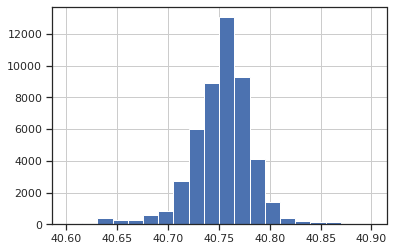

In [0]:
data[logical_and(data.dropoff_latitude > 40.6, data.dropoff_latitude<40.9)].dropoff_latitude.hist(bins=20);

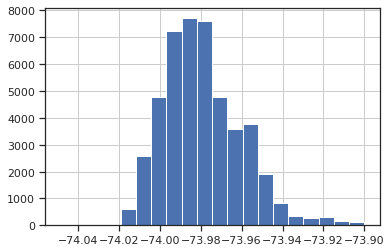

In [0]:
data[logical_and(data.dropoff_longitude>-74.05,data.dropoff_longitude<-73.9)].dropoff_longitude.hist(bins=20);

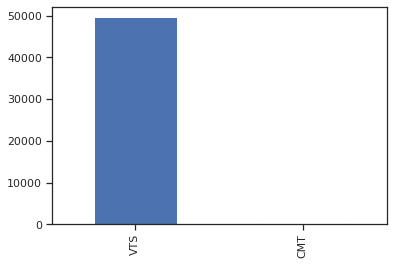

In [0]:
data.vendor_id.value_counts().plot(kind="bar");

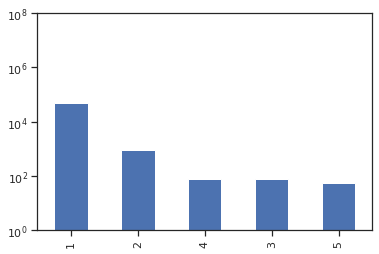

In [0]:
data.rate_code.value_counts().plot(kind="bar",logy=True, ylim=(1,1e8));

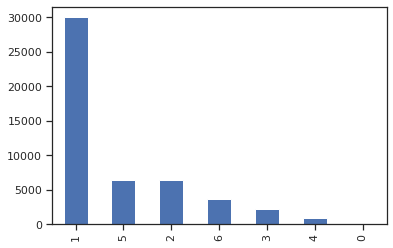

In [0]:
data.passenger_count.value_counts().plot(kind="bar");

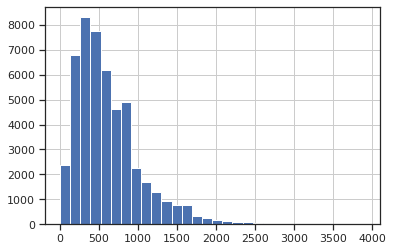

In [0]:
data.trip_time_in_secs[data.trip_time_in_secs<4000].hist(bins=30);

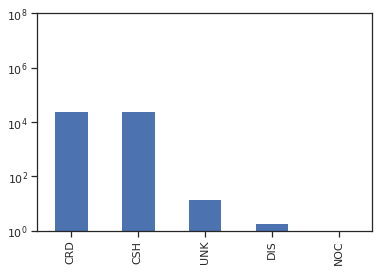

In [0]:
data[' payment_type'].value_counts().plot(kind="bar",logy=True,ylim=(1,1e8));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(0, 40)

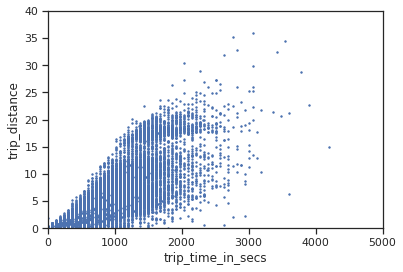

In [0]:
data.plot(x="trip_time_in_secs",y="trip_distance",kind="scatter",s=2)
xlim(0,5000)
ylim(0,40)

(-74.05, -73.9)

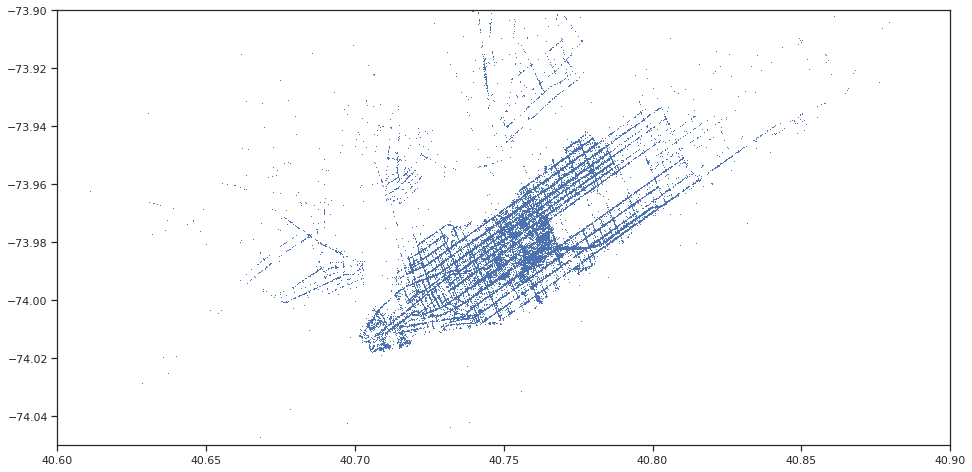

In [0]:
figure(figsize=(16,8))
plot(data["pickup_latitude"], data["pickup_longitude"],'b,')
xlim(40.6,40.9)
ylim(-74.05,-73.9)

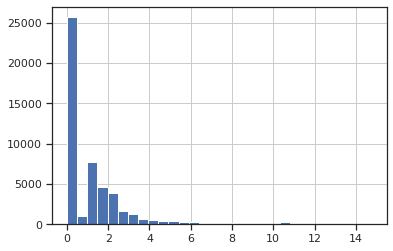

In [0]:
data[data[' tip_amount']<15][' tip_amount'].hist(bins=30)

In [0]:
len(data)
data_subset = data[data[' payment_type']!="CSH"]
data_subset.reset_index(inplace=True, drop=True)
len(data_subset)

25143

In [0]:
# Setup target
data_subset['tipped']=(data_subset[' tip_amount']>0).astype("int")
data_subset['tipped'].value_counts()

1    24179
0      964
Name: tipped, dtype: int64

In [0]:
feats1=['rate_code','passenger_count','trip_time_in_secs','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',' fare_amount',' surcharge',' mta_tax',' tolls_amount']
M=len(data_subset)
rand_idx=arange(M)
random.shuffle(rand_idx)
train_idx = rand_idx[int(M*0.2):]
test_idx = rand_idx[:int(M*0.2)]

from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
normalizer.fit(data_subset.loc[train_idx,feats1])
data_subset_scaled = normalizer.transform(data_subset[feats1])


gridsearch.best_params_ = {'C': 0.0001, 'penalty': 'l2'}
test_auc = 0.9614160700079555
test_auc = 0.554157329039838


Text(0, 0.5, 'True positive rate')

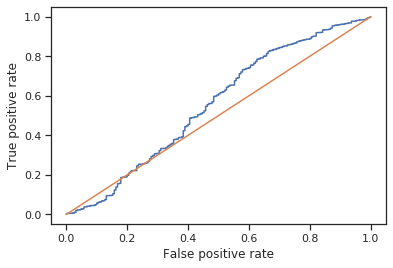

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore',category=ConvergenceWarning)

from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, log_loss,
                             roc_curve, roc_auc_score)

logreg = LogisticRegression()
parameters = {'penalty': ['l2'],
              'C': [10e-5, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3, 10e5]}
gridsearch = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)
gridsearch.fit(data_subset.loc[train_idx,feats1],data_subset['tipped'].loc[train_idx])
print(f'gridsearch.best_params_ = {gridsearch.best_params_}')

best_logreg = gridsearch.best_estimator_

y_pred = best_logreg.predict(data_subset.ix[test_idx,feats1])

y_prob = best_logreg.predict_proba(data_subset.ix[test_idx,feats1])
test_acc = accuracy_score(data_subset['tipped'].loc[test_idx], y_pred)
print(f'test_auc = {test_acc}')

fpr, tpr, thr = roc_curve(data_subset['tipped'].loc[test_idx], y_prob[:,1])
test_auc = roc_auc_score(data_subset['tipped'].loc[test_idx], y_prob[:,1])
print(f'test_auc = {test_auc}')

plot(fpr,tpr)
plot(fpr,fpr)
xlabel("False positive rate")
ylabel("True positive rate")

In [0]:
!pip install vaderSentiment

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [0]:
def sentiment_score(text):
  score = analyser.polarity_scores(text)
  lb = score['compound']
  if lb>=0.05:
    return 1
  elif (lb>-0.05) and (lb<0.05):
    return 0
  else:
    return -1

In [0]:
print(sentiment_score('I like my life in Handong'))
print(sentiment_score('I hate being rude'))
print(sentiment_score('Mr.Scott works at Dunder Mifflin'))

1
-1
0


In [0]:
!pip install googletrans
from googletrans import Translator
translator = Translator()

In [0]:
translator.translate('hola, todo bien? gracias!').text

'hello, all right? thanks!'

In [0]:
def sentiment_scores(text,en=True):
  if en:
    trans = text
  else:
    trans = Translator.translate(text).text
  score = analyser.polarity_scores(trans)
  lb=score['compound']
  if lb >= 0.05:
    return 1
  elif (lb > -0.05) and (lb < 0.05):
    return 0
  else:
    return -1

In [0]:
!pip install tweepy

In [0]:
import tweepy

consumer_key = '97L1tE1wgkTM895WGBB0v29lx'
consumer_secret = 'EsY6jC0IAH00R6CZg59SiufEyv7yLlaZMmARvJB1lZDrM5c1Zp'
access_token = '1217659045491830786-e5rLEAlMqaavUR8i3M7T4URNV36O5y'
access_token_secret = 'SpmAppFVXtzzkq3qnyfcvN9QvDFXoupQHu2wgUXbS1HL0'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [0]:
tweets = api.user_timeline('@TYPE4GRAPHIC',count=5,tweet_mode='extended')
for t in tweets:
  print(t.full_text)
  print()

약속은 없는데 나갈 일이 너무 많네. 돈 나갈 일.

이런저런 인연들을 겪고 나니, 정말 함께 하고 싶은 사람은 ‘내가 좋아하는 사람’도 ‘나를 좋아하는 사람’도 아니었다. 내가 나를 좋아할 수 있게 만들어 주는 사람이었다.

좋아하는 일이라는 건 마냥 즐거운 일인 줄 알았는데, 힘들고 괴로운 날이 있더라도 계속 하고 싶다면 그게 좋아하는 일인 것 같다.

생각을 잊지 않으려고 메모를 시작했는데
메모를 시작했다는 사실을 자꾸만 잊는다

RT @NeWiver_: ????? https://t.co/alb0NKFd3d



In [0]:
def list_tweets(user_id, count, prt = False):
  tweets = api.user_timeline("@" + user_id, count = count, tweet_mode = 'extended')
  tw = []
  for t in tweets:
    tw.append(t.full_text)
    if prt:
      print(t.full_text)
      print()
  return tw

In [0]:
user_id = 'realDonaldTrump'
count = 200
tw_trump = list_tweets(user_id, count)

In [0]:
tw_trump[2]

'https://t.co/RcUcLBl9tT https://t.co/1OIXKTv0hp'

In [0]:
sentiment_scores(tw_trump[2])

0

In [0]:
import seaborn as sns

def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

def clean_tweets(lst):
  lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
  lst = np.vectorize(remove_pattern)(list, "@[\w]*")
  lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
  lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
  return lstsq

def plot_tweets(lst, title='Tweets Sentiment', engl=True):
  sents = []
  for tw in lst:
    try:
      st = sentiment_scores(tw, engl)
      sents.append(st)
    except:
      sents.append(0)
  ax = sns.distplot(sents, kde=False, bins=3)
  ax.set(xlabel='Negative        Neutral          Positive',
         ylabel='#Tweets',
         title="Tweets of @"+title)
  return sents

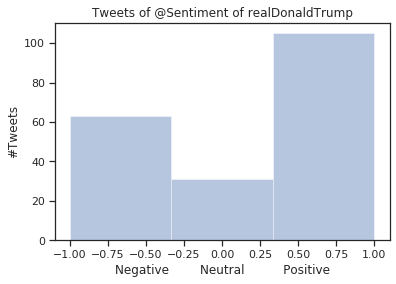

In [0]:
scores_tw_trump = plot_tweets(tw_trump, 'Sentiment of ' + user_id)

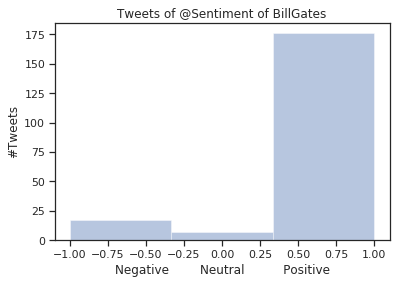

In [0]:
user_id = 'BillGates'
tw_gates = list_tweets(user_id, count)
scores_tw_gates = plot_tweets(tw_gates, 'Sentiment of ' + user_id)

In [0]:
!pip install wordcloud
import wordcloud as WordCloud

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def word_cloud(wd_list):
  stopwords = set(STOPWORDS)
  stopwords.add('https')
  stopwords.add('co')
  stopwords.add('RT')
  all_words = ' '.join([text for text in wd_list])
  if len(all_words) == 0:
    return
  
  wcloud = WordCloud(background_color='white',
                     stopwords=stopwords,
                     width=1600,
                     height=800,
                     colormap='jet',
                     max_words=100,
                     max_font_size=200).generate(all_words)
  plt.figure(figsize=(12, 10))
  plt.axis('off')
  plt.imshow(wcloud, interpolation="bilinear");

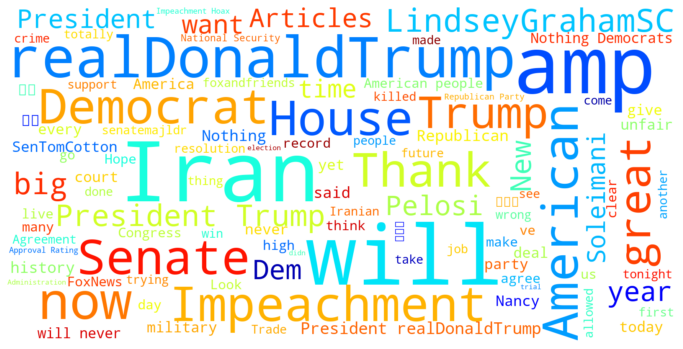

In [0]:
word_cloud(tw_trump)

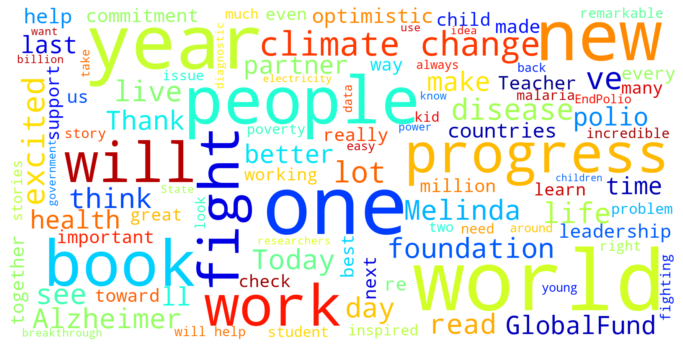

In [0]:
word_cloud(tw_gates)

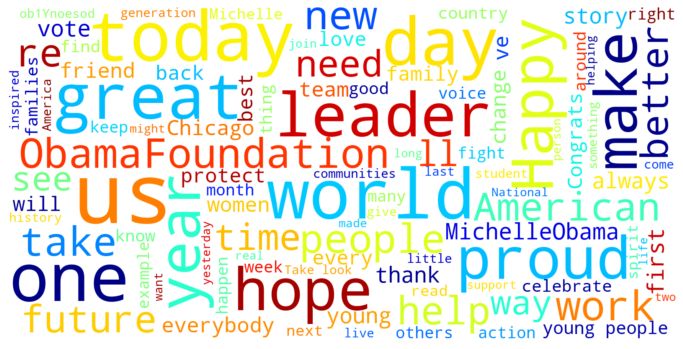

In [0]:
tw_obama = list_tweets('BarackObama', count)
word_cloud(tw_obama)

In [0]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def word_cloud(wd_list, url=''):
  stopwords = set(STOPWORDS)
  stopwords.add('https')
  stopwords.add('co')
  all_words = ''.join([text for text in wd_list])
  if len(all_words) == 0:
    return
  
  if url:
    response = requests.get(url)
    char_mask = np.array(Image.open(BytesIO(response.content)))
    image_colors = ImageColorGenerator(char_mask)

    wc = WordCloud(background_color='white',
                   stopwords=stopwords,
                   width=800,
                   # height=400,
                   max_words=100,
                   mask=char_mask).generate(all_words)
    plt.imshow(wc.recolor(color_func=image_colors))

  else:
    wcloud = WordCloud(background_color='white',
                   stopwords=stopwords,
                   width=1600,
                   height=800,
                   colormap='jet',
                   max_words=100,
                   max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wcloud, interpolation='bilinear');

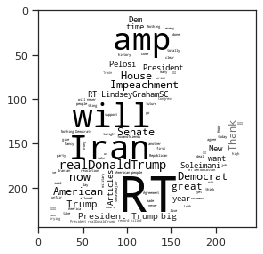

In [0]:
word_cloud(tw_trump,
           'https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_trump.png')

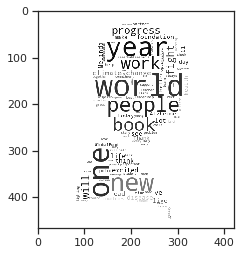

In [0]:
word_cloud(tw_gates,
           'https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_gates.png')

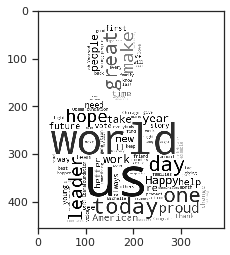

In [0]:
word_cloud(tw_obama,
           'https://raw.githubusercontent.com/charmgil/charmgil.github.io/master/img/slh_obama.png')

In [0]:
import csv, time

def twitter_stream_listener(file_name, filter_track,
                            follow=None,
                            locations=None,
                            languages=None,
                            time_limit=20):
  class CustomStreamListener(tweepy.StreamListener):
    def __init__(self, time_limit):
      self.start_time = time.time()
      self.limit = time_limit
      self.n_twts = 0
      # self.saveFile = open('abcd.json', 'a')
      super(CustomStreamListener, self).__init__()
    
    def on_status(self, status):
      if (time.time() - self.start_time) < self.limit:
        self.n_twts = self.n_twts + 1

        if self.n_twts % 10 == 0:
          print(".", end="")
        
        if self.n_twts % 100 == 0:
          print(str(self.n_twts) + ' tweets received')
        
        with open(file_name, 'a') as f:
          writer = csv.writer(f)
          writer.writerow([status.author.screen_name, status.created_at,
                           status.text])
      else:
          print("\n\n[INFO] Closing file and ending streaming")
          return False
    
    def on_error(self, status_code):
      if status_code == 420:
        print("Encountered error code 420. Disconnecting the stream")
        return False
      else:
        print("Encountered error with status code: {}".format(status_code))
        return True

    def on_timeout(self):
      print('Timeout...')
      return True
    
  print("\n[INFO] Open file:[{}] and starting {} seconds of streaming for {}\n".format(file_name, time_limit, filter_track))
  with open(file_name, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['author', 'date', 'text'])
    
  streamingAPI = tweepy.streaming.Stream(auth, CustomStreamListener(time_limit=time_limit))
  streamingAPI.filter(track=filter_track,
                      follow=follow,
                      locations=locations,
                      languages=languages)
  f.close()


[INFO] Open file:[tmp_tweets.csv] and starting 60 seconds of streaming for ['bts', 'youtube']

..........100 tweets received
..........200 tweets received
..........300 tweets received
..........400 tweets received
..........500 tweets received
..........600 tweets received
..........700 tweets received
........

[INFO] Closing file and ending streaming

[INFO] Open file:[tmp_tweets.csv] and starting 60 seconds of streaming for ['bts', 'youtube']

..........100 tweets received
..........200 tweets received
..........300 tweets received
..........400 tweets received
..........500 tweets received
..........600 tweets received
..........700 tweets received
........

[INFO] Closing file and ending streaming


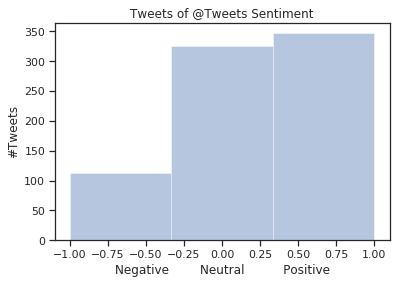

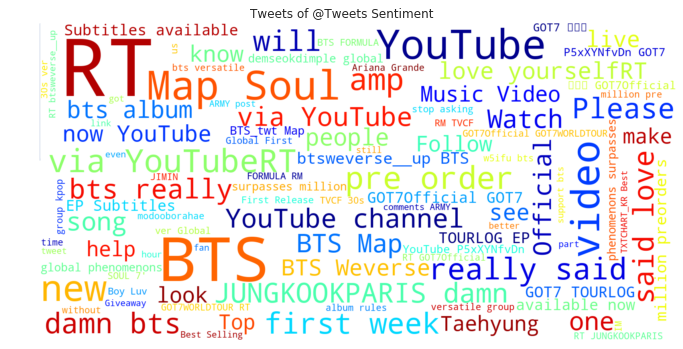

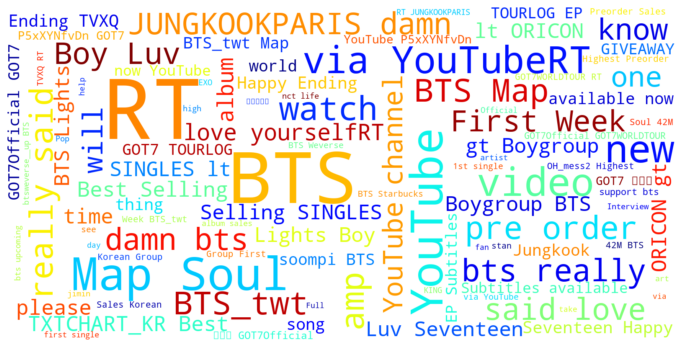

In [0]:
#### **Monitoring the Tweets about BTS and Youtube**
filter_track = ['bts', 'youtube']
filename = 'tmp_tweets.csv'
twitter_stream_listener(filename, filter_track, languages=['en'], time_limit=60)


import pandas as pd
df_tweets = pd.read_csv(filename)
df_tweets.shape
df_tweets.head()


df_tweets['sent'] = plot_tweets(df_tweets.text)


df_tweets.head()


word_cloud(df_tweets.text)#### **Monitoring the Tweets about BTS and Youtube**
filter_track = ['bts', 'youtube']
filename = 'tmp_tweets.csv'
twitter_stream_listener(filename, filter_track, languages=['en'], time_limit=60)


import pandas as pd
df_tweets = pd.read_csv(filename)
df_tweets.shape
df_tweets.head()


df_tweets['sent'] = plot_tweets(df_tweets.text)


df_tweets.head()


word_cloud(df_tweets.text)

In [0]:
import re
def hashtags_extract(x):
  hashtags = []
  for i in x:
    ht = re.findall(r'#(\w+)', i)
    hashtags.append(ht)

  return hashtags

htags_pos = hashtags_extract(df_tweets['text'][df_tweets['sent'] == 1])
htags_neg = hashtags_extract(df_tweets['text'][df_tweets['sent'] == -1])
htags_pos = sum(htags_pos,[])
htags_neg = sum(htags_neg,[])

TypeError: ignored

In [0]:
hist_freq_hashtags(htags_pos,'Positive Hashtag',20)